# Environment Settup

In [3]:
! pip install yfinance

In [4]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from scipy.optimize import root
from numpy.core.function_base import linspace
from scipy.stats import skew, kurtosis

In [5]:
# Matplotlib Darkmode (optional)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler

colors = cycler('color',
                ['#2a7beb', '#1cbf68', '#7669d1',
                 '#edc22d', '#ee3f3f', '#55defd',
                 '#fafdc6'])
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Multi-Asset Portfolio

## Individual performance 

[*********************100%***********************]  4 of 4 completed
Asset's Statitistic Description


,AMZN,KO,TSLA,^GSPC
count,1890.000,1890.000,1890.000,1890.000
mean,0.364,0.120,0.470,0.136
std,0.309,0.142,0.508,0.143
min,-0.127,-0.060,-0.193,-0.067
25%,-0.008,-0.004,-0.014,-0.003
50%,0.001,0.000,0.001,0.001
75%,0.012,0.005,0.018,0.005
max,0.157,0.057,0.244,0.047


Asset's Correlation Table


[]

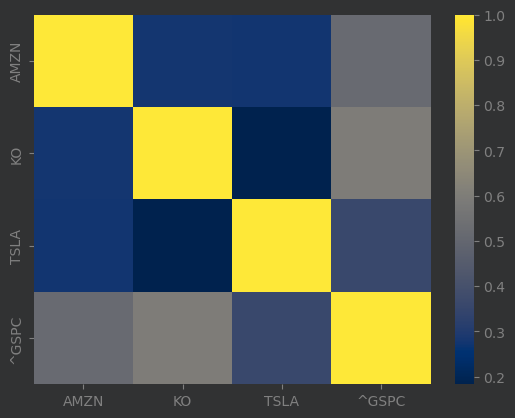

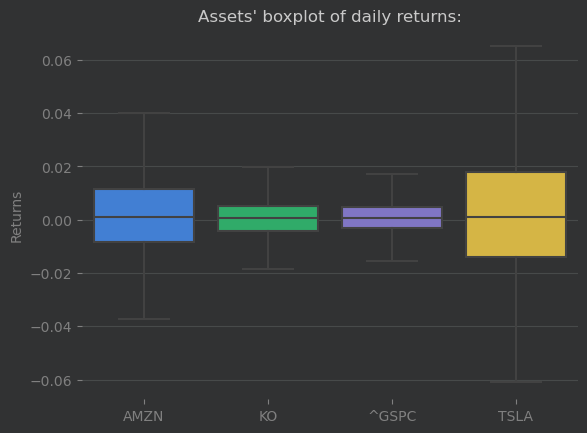

In [81]:
# Assets of the portfolio
assets = ['AMZN','KO','^GSPC','TSLA']

# Download of the market data for every asset
f = yf.download(assets, start = "2007-01-01", end = "2018-01-01")["Adj Close"].pct_change(1).dropna()

# Assets' data description
description = np.round(np.transpose([[1,252,np.sqrt(252),1,1,1,1,1]])*f.describe(),3)
print("Asset's Statitistic Description")
display(description)

# Assets' correletion
correlation = f.corr()
print("Asset's Correlation Table")
sns.heatmap(correlation, cmap="cividis")

# Assets' Boxplot
plt.figure()
box_plot_data = f[assets]
box_plot_data.columns = assets
sns.boxplot(data=box_plot_data,showfliers = False).set(title="Assets' boxplot of daily returns:", ylabel="Returns")
plt.plot()

## Equally weighted performance (EW)

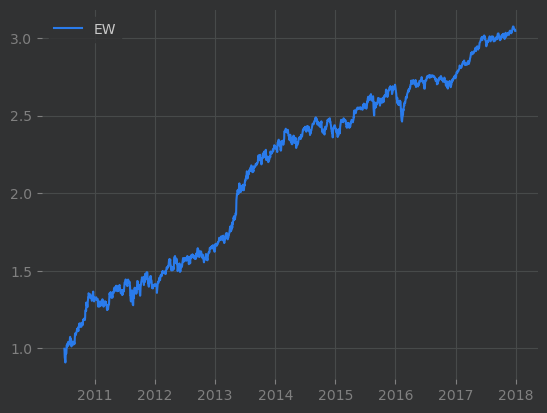

In [82]:
# Number of assets in the portfolio
n=len(f.transpose())

# Attribution of equal weights in EW portfolio
x0 = np.zeros(n)+(1/n)
ew_weights = np.round(x0,3)


# Creation of the portfolio 
sample_EW = np.multiply(ew_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.legend(['EW'])
plt.show()

# Single Criterion Optimization (Simple non-linear problem solving)

## Excess Return optimization 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.0016960789968407744
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9
[0.406 0.    0.594 0.   ]


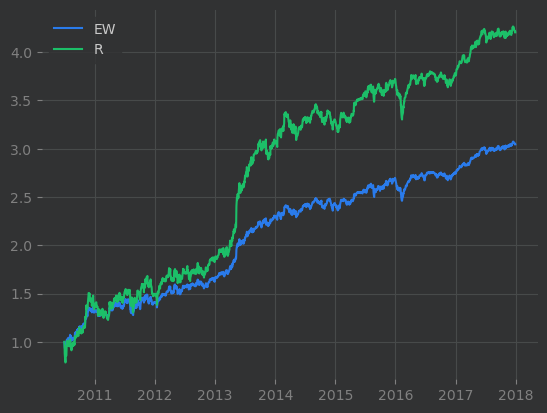

In [83]:
# Optimized return function 
def return_criterion(weight, returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    criterion = -mu
    return criterion 

# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(return_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': True})

# Result
r_weights = np.round(res.x,3)
print(r_weights)


# Creation of the portfolio 
sample_r = np.multiply(r_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.legend(['EW','R'])
plt.show()


## Variance optimization 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.008012170275775216
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8
[0.    0.541 0.    0.459]


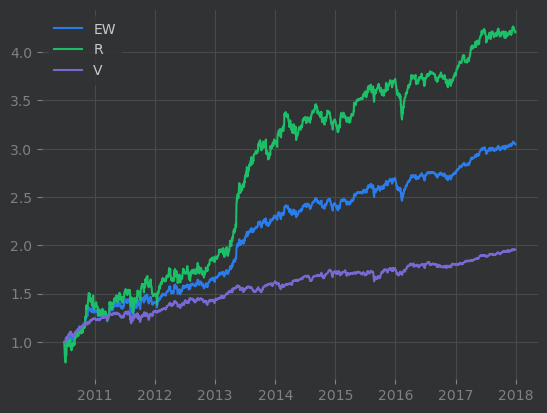

In [84]:
def volatility_criterion(weight, returns):
    pf_return = returns.values.dot(weight)
    sigma = np.std(pf_return)
    criterion = sigma
    return criterion

# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(volatility_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': True})

# Result
v_weights = np.round(res.x,3)
print(v_weights)

# Creation of the portfolio 
sample_v = np.multiply(v_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.legend(['EW','R','V'])
plt.show()

## Skewness optimization 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.5155624667501957
            Iterations: 3
            Function evaluations: 15
            Gradient evaluations: 3
[0. 0. 1. 0.]


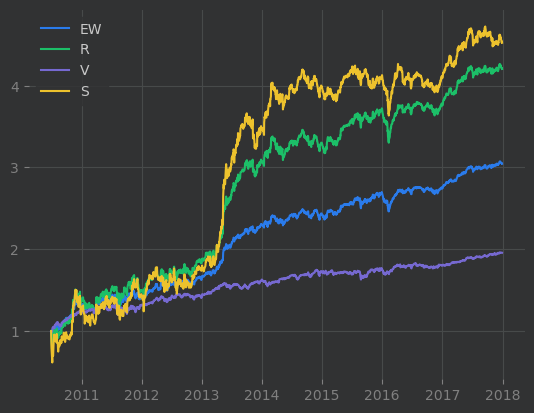

In [85]:
def skeweness_criterion(weight,returns):
  pf_return = returns.values.dot(weight)
  skew_ret=skew(pf_return,0)
  criterion = -skew_ret
  return criterion 
  
  
# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(skeweness_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': True})

# Result
s_weights = np.round(res.x,3)
print(s_weights)

# Creation of the portfolio 
sample_s = np.multiply(s_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.legend(['EW','R','V','S'])
plt.show()


## Kurtosis optimization 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.6269700181066638
            Iterations: 10
            Function evaluations: 53
            Gradient evaluations: 10
[0.236 0.594 0.17  0.   ]


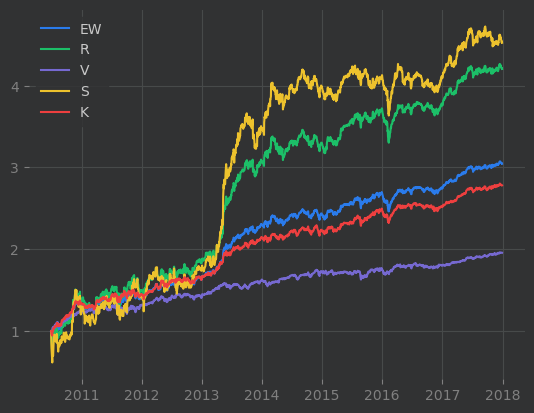

In [86]:
def kurtosis_criterion(weight,returns):
  pf_return = returns.values.dot(weight)
  kurt_ret=kurtosis(pf_return,0)
  criterion = kurt_ret
  return criterion 
  
  
# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(kurtosis_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': True})

# Result
k_weights = np.round(res.x,3)
print(k_weights)

# Creation of the portfolio 
sample_k = np.multiply(k_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.legend(['EW','R','V','S','K'])
plt.show()

# Multi-criterion Optimization 

## Non-normalized criterion approach 

[0.253 0.565 0.182 0.   ]


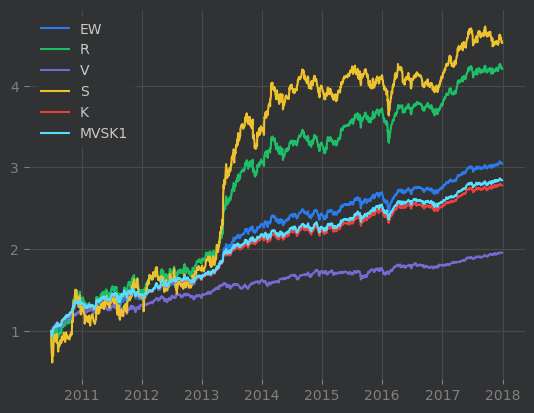

In [87]:
def mvsk_criterion_1(weight,returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    sigma = np.std(pf_return)
    skew_ret=skew(pf_return,0)
    kurt_ret=kurtosis(pf_return,0)
    # Linear criterion attribution 
    criterion = kurt_ret + sigma- skew_ret - mu
    return criterion 


# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(mvsk_criterion_1, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
mvsk1_weights = np.round(res.x,3)
print(mvsk1_weights)

# Creation of the portfolio 
sample_mvsk1 = np.multiply(mvsk1_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.plot(sample_mvsk1.cumsum()+1)
plt.legend(['EW','R','V','S','K','MVSK1'])
plt.show()

Here we clearly see the quasi-perfect match between Kurtosis and Mean-Variance-Skewness-Kurtosis in terms of performance and then in weights. that is explained by the over-weighting of he kurtosis score in a non-normalized multi-criterion optimization. The convex optimization will automatically find a local minimum driven only by the kurtosis criterion. We must then introduced an normalized objective fonction in this optimization problem. 

## Normalized criterion approach 

Weights Mean Opt: [0.406 0.    0.594 0.   ]
Performance Mean Opt: 0.42736974112863524
Weights Variance Opt: [0.    0.541 0.    0.459]
Performance Variance Opt: 0.12751459965667705
Weights Skewness Opt: [0. 0. 1. 0.]
Performance Skewness Opt: 0.4704293710833953
Weights Kurtosis Opt: [0.236 0.594 0.17  0.   ]
Performance Kurtosis Opt: 0.237446973441934
[0.244 0.58  0.176 0.   ]


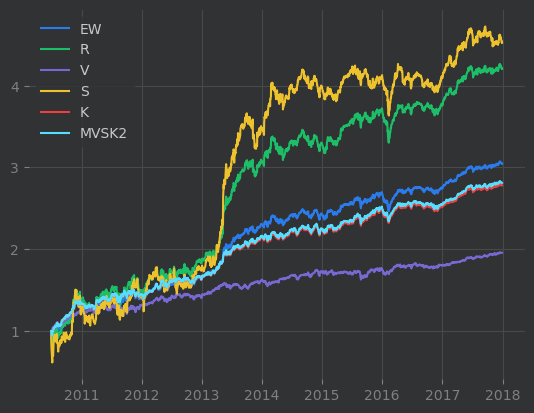

In [90]:

### __________________ Two - Step Progamming Optimization __________________



## The first step consists in finding invidual criterion optimal scores 

# Mean Optimization ______________________________________________________________________________________________________

# Optimization problem solving
res = minimize(return_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
r_weights = np.round(res.x,3)

# Creation of the portfolio 
opt_mu = np.sum(np.multiply(r_weights,f.dropna()), axis = 1).mean()*252

print("Weights Mean Opt: " + str(r_weights))
print("Performance Mean Opt: " + str(opt_mu))



# Variance Optimization ______________________________________________________________________________________________________

# Optimization problem solving
res = minimize(volatility_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
v_weights = np.round(res.x,3)

# Creation of the portfolio 
opt_sigma = np.sum(np.multiply(v_weights,f.dropna()), axis = 1).mean()*252

print("Weights Variance Opt: " + str(v_weights))
print("Performance Variance Opt: " + str(opt_sigma))



# Skewness Optimization ______________________________________________________________________________________________________

# Optimization problem solving
res = minimize(skeweness_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
s_weights = np.round(res.x,3)

# Creation of the portfolio 
opt_skew = np.sum(np.multiply(s_weights,f.dropna()), axis = 1).mean()*252

print("Weights Skewness Opt: " + str(s_weights))
print("Performance Skewness Opt: " + str(opt_skew))



# Kurtosis Optimization ______________________________________________________________________________________________________

# Optimization problem solving
res = minimize(kurtosis_criterion, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
k_weights = np.round(res.x,3)

# Creation of the portfolio 
opt_kurt = np.sum(np.multiply(k_weights,f.dropna()), axis = 1).mean()*252

print("Weights Kurtosis Opt: " + str(k_weights))
print("Performance Kurtosis Opt: " + str(opt_kurt))











# The second step consists in resolving the final optimization problem with previously found individuals optimal criterions 


def mvsk_criterion_2(weight,returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    sigma = np.std(pf_return)
    skewness=skew(pf_return,0)
    kurt=kurtosis(pf_return,0)
    # Linear criterion attribution 
    criterion = abs(kurt/opt_kurt) + abs(sigma/opt_sigma) + abs(skewness/opt_skew) + abs(mu/opt_mu)
    return criterion 


# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(mvsk_criterion_2, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
mvsk2_weights = np.round(res.x,3)
print(mvsk2_weights)

# Creation of the portfolio 
sample_mvsk2 = np.multiply(mvsk2_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.plot(sample_mvsk2.cumsum()+1)
plt.legend(['EW','R','V','S','K','MVSK2'])
plt.show()

## Normalized criterion with investor preference approach 

[0.251 0.25  0.251 0.248]


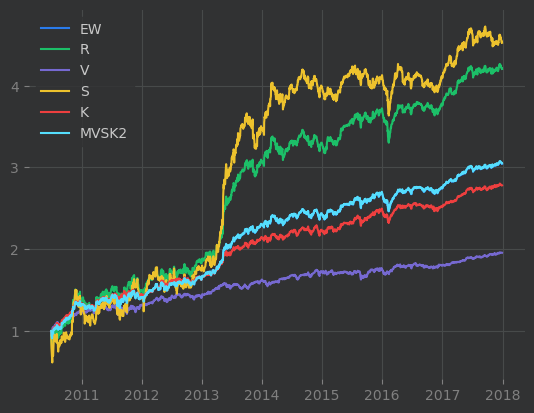

In [89]:
# The second step consists in resolving the final optimization problem with previously found individuals optimal criterions 

def mvsk_criterion_2(weight,returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    sigma = np.std(pf_return)
    skewness=skew(pf_return,0)
    kurt=kurtosis(pf_return,0)
    # Linear criterion attribution 
    criterion = abs(kurt/opt_kurt)**0 + abs(sigma/opt_sigma)**4 + abs(skewness/opt_skew)**1 + abs(mu/opt_mu)**1
    return criterion 


# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Optimization constraints problem and bounds
cons=({'type':'eq', 'fun': lambda x:sum(abs(x))-1})
bound= [(0 , 1) for i in range(0,n)]

# Optimization problem solving
res = minimize(mvsk_criterion_2, x0, method="SLSQP", args=(f.dropna()),bounds=bound,constraints=cons,options={'disp': False})

# Result
mvsk2_weights = np.round(res.x,3)
print(mvsk2_weights)

# Creation of the portfolio 
sample_mvsk2 = np.multiply(mvsk2_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.plot(sample_mvsk2.cumsum()+1)
plt.legend(['EW','R','V','S','K','MVSK2'])
plt.show()

# Conclusion 